In [1]:
import numpy as np
import pandas as pd

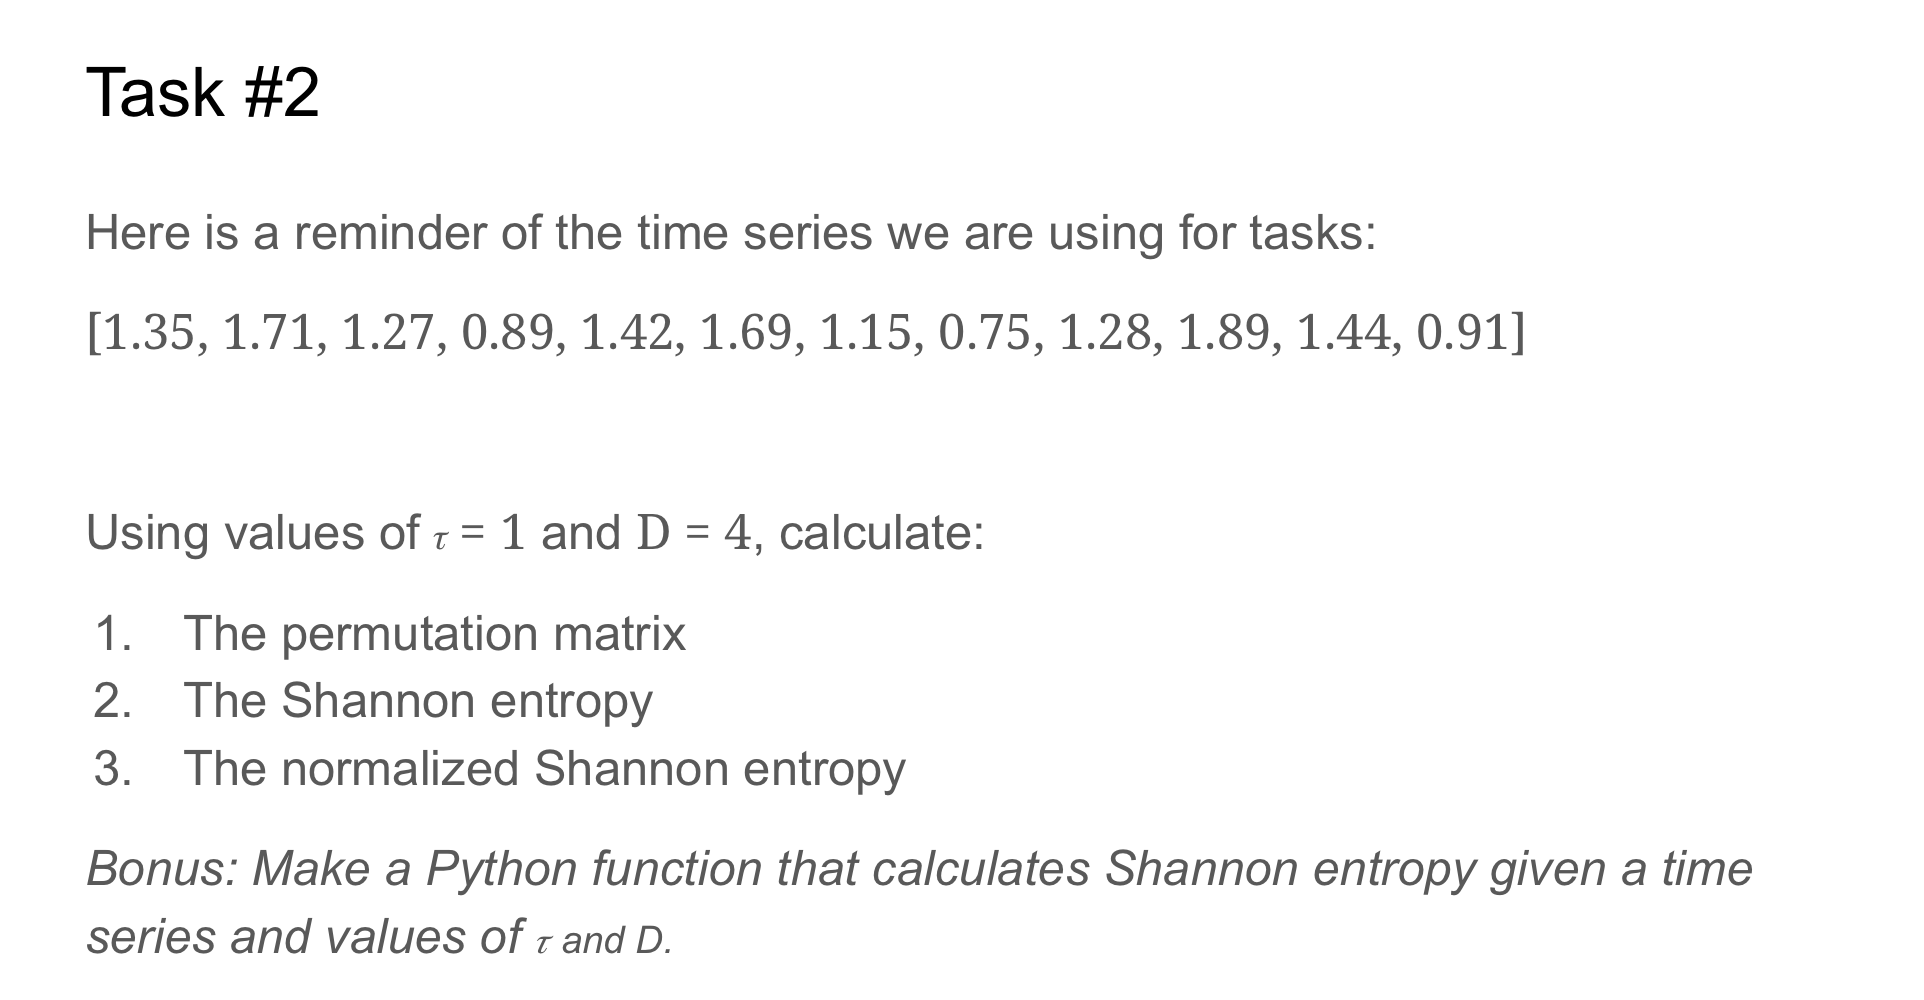

# by hand

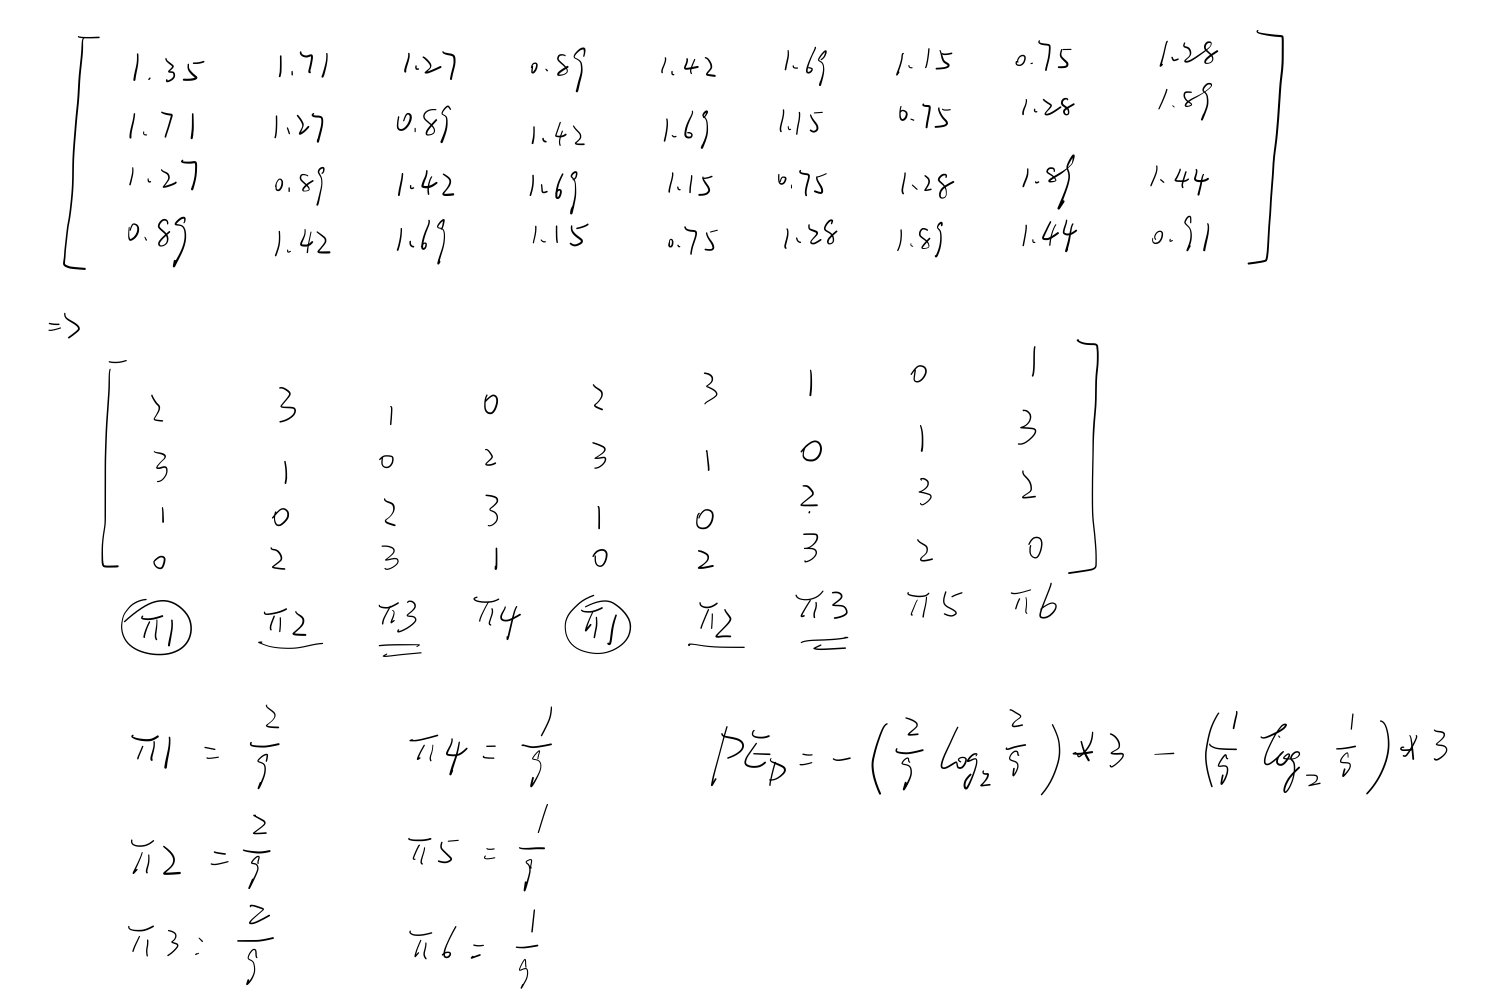

In [2]:
-3*((2/9)*np.log2(2/9))-3*((1/9)*np.log2(1/9))

2.503258334775646

**scipy.stats.entropy(pk, qk=None, base=None, axis=0)**[source]  

Parameters:  
pk: array_like  
Defines the (discrete) distribution. Along each axis-slice of pk, element i is the (possibly unnormalized) probability of event i.

qk: array_like, optional   
Sequence against which the relative entropy is computed. Should be in the same format as pk.

base: float, optional  
The logarithmic base to use, defaults to e (natural logarithm).

axis: int, optional  
The axis along which the entropy is calculated. Default is 0.

Returns:  
S{float, array_like}  
The calculated entropy.

In [64]:
from scipy.stats import entropy
entropy([2/9,2/9,2/9,1/9,1/9,1/9],base=2)

2.503258334775646

# Step by Step

In [3]:
task2 = [1.35, 1.71, 1.27, 0.89, 1.42, 1.69, 1.15, 0.75, 1.28, 1.89, 1.44, 0.91]

In [14]:
delay = 1
D = 4
matrix = np.zeros((D,(len(task2)-delay*(D-1))))
matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
for i in range(4):
    for j in range(9):
       matrix[i,j] = task2[i+j]
matrix

array([[1.35, 1.71, 1.27, 0.89, 1.42, 1.69, 1.15, 0.75, 1.28],
       [1.71, 1.27, 0.89, 1.42, 1.69, 1.15, 0.75, 1.28, 1.89],
       [1.27, 0.89, 1.42, 1.69, 1.15, 0.75, 1.28, 1.89, 1.44],
       [0.89, 1.42, 1.69, 1.15, 0.75, 1.28, 1.89, 1.44, 0.91]])

In [16]:
for j in range(9):
    # sort each column and return the original index
    sort_index = np.argsort(matrix[:,j],axis=0) 
    # replace each column by rank
    t=0
    for i in sort_index:
        matrix[i,j]=t
        t+=1
matrix

array([[2., 3., 1., 0., 2., 3., 1., 0., 1.],
       [3., 1., 0., 2., 3., 1., 0., 1., 3.],
       [1., 0., 2., 3., 1., 0., 2., 3., 2.],
       [0., 2., 3., 1., 0., 2., 3., 2., 0.]])

In [17]:
matrix.T

array([[2., 3., 1., 0.],
       [3., 1., 0., 2.],
       [1., 0., 2., 3.],
       [0., 2., 3., 1.],
       [2., 3., 1., 0.],
       [3., 1., 0., 2.],
       [1., 0., 2., 3.],
       [0., 1., 3., 2.],
       [1., 3., 2., 0.]])

In [18]:
matrix

array([[2., 3., 1., 0., 2., 3., 1., 0., 1.],
       [3., 1., 0., 2., 3., 1., 0., 1., 3.],
       [1., 0., 2., 3., 1., 0., 2., 3., 2.],
       [0., 2., 3., 1., 0., 2., 3., 2., 0.]])

In [19]:
matrix = pd.DataFrame(matrix)

In [20]:
matrix

,0,1,2,3,4,5,6,7,8
0,2.0,3.0,1.0,0.0,2.0,3.0,1.0,0.0,1.0
1,3.0,1.0,0.0,2.0,3.0,1.0,0.0,1.0,3.0
2,1.0,0.0,2.0,3.0,1.0,0.0,2.0,3.0,2.0
3,0.0,2.0,3.0,1.0,0.0,2.0,3.0,2.0,0.0


In [38]:
matrix_t = pd.DataFrame(matrix.T)
matrix_t

,0,1,2,3
0,2.0,3.0,1.0,0.0
1,3.0,1.0,0.0,2.0
2,1.0,0.0,2.0,3.0
3,0.0,2.0,3.0,1.0
4,2.0,3.0,1.0,0.0
5,3.0,1.0,0.0,2.0
6,1.0,0.0,2.0,3.0
7,0.0,1.0,3.0,2.0
8,1.0,3.0,2.0,0.0


In [56]:
matrix_drop_dup = matrix_t.drop_duplicates()
matrix_drop_dup

,0,1,2,3
0,2.0,3.0,1.0,0.0
1,3.0,1.0,0.0,2.0
2,1.0,0.0,2.0,3.0
3,0.0,2.0,3.0,1.0
7,0.0,1.0,3.0,2.0
8,1.0,3.0,2.0,0.0


In [58]:
matrix_drop_dup=matrix_drop_dup.reset_index(drop=True)
matrix_drop_dup

,0,1,2,3
0,2.0,3.0,1.0,0.0
1,3.0,1.0,0.0,2.0
2,1.0,0.0,2.0,3.0
3,0.0,2.0,3.0,1.0
4,0.0,1.0,3.0,2.0
5,1.0,3.0,2.0,0.0


In [59]:
matrix_drop_dup.shape[0]

6

In [60]:
matrix_drop_dup['type']='0'
for i in range(matrix_drop_dup.shape[0]):
    matrix_drop_dup.loc[i,'type']=f"type{i+1}"
matrix_drop_dup

,0,1,2,3,type
0,2.0,3.0,1.0,0.0,type1
1,3.0,1.0,0.0,2.0,type2
2,1.0,0.0,2.0,3.0,type3
3,0.0,2.0,3.0,1.0,type4
4,0.0,1.0,3.0,2.0,type5
5,1.0,3.0,2.0,0.0,type6


In [39]:
matrix_final = pd.merge(matrix_t,matrix_drop_dup,how='left')
matrix_final

,0,1,2,3,type
0,2.0,3.0,1.0,0.0,t1
1,3.0,1.0,0.0,2.0,t2
2,1.0,0.0,2.0,3.0,t3
3,0.0,2.0,3.0,1.0,t4
4,2.0,3.0,1.0,0.0,t1
5,3.0,1.0,0.0,2.0,t2
6,1.0,0.0,2.0,3.0,t3
7,0.0,1.0,3.0,2.0,t5
8,1.0,3.0,2.0,0.0,t6


In [40]:
type_count_number = pd.value_counts(matrix_final['type'])
type_count_number

type
t1    2
t2    2
t3    2
t4    1
t5    1
t6    1
Name: count, dtype: int64

In [41]:
type(type_count_number)

pandas.core.series.Series

In [46]:
type_count_number = pd.DataFrame(type_count_number)
type_count_number['proportion']=0
type_count_number

,count,proportion
type,,
t1,2,0
t2,2,0
t3,2,0
t4,1,0
t5,1,0
t6,1,0


In [49]:
sum_count = type_count_number['count'].sum()
sum_count

9

In [52]:
shannon_entropy = 0
for index, row in type_count_number.iterrows():
    pi = type_count_number.loc[index,'count']/sum_count
    type_count_number.loc[index,'proportion'] = pi
    shannon_entropy -= pi * np.log2(pi)
display(type_count_number)
print(shannon_entropy)

,count,proportion
type,,
t1,2,0.222222
t2,2,0.222222
t3,2,0.222222
t4,1,0.111111
t5,1,0.111111
t6,1,0.111111


2.5032583347756456


# in one func

In [61]:
def shannon_entropy(time_series,delay,D):
    num_rows = D
    num_cols = len(time_series)-delay*(D-1)
    matrix = np.zeros((num_rows,num_cols))
    for i in range(num_rows):
        for j in range(num_cols):
           matrix[i,j] = time_series[i+j]
    print('overlapping column vertors of length {} with values {} time period:\n'.format(D,delay),matrix)
    
    
    for j in range(num_cols):
    # sort each column and return the original index
        sort_index = np.argsort(matrix[:,j],axis=0) 
    # replace each column by rank
        t=0
        for si in sort_index:
            matrix[si,j]=t
            t+=1
    print('permutation matrix:\n',matrix)
    
    # trans matrix, so we can do the drop_duplicates to each original columns (which is column after trans)
    # but only trans will make pandas array to normal arrray
    matrix_t = pd.DataFrame(matrix.T)
    matrix_drop_dup = matrix_t.drop_duplicates()
    # after drop_duplicates, the index is still remain unchanged, so reset it
    matrix_drop_dup=matrix_drop_dup.reset_index(drop=True)
    # insert a column type
    matrix_drop_dup['type']='0'
    for i in range(matrix_drop_dup.shape[0]):
        matrix_drop_dup.loc[i,'type']=f"type{i+1}"
    print('matrix without duplicates:\n',matrix_drop_dup)
    
    # left joint two matrix, so each column in matrix_t could be assign a type
    matrix_final = pd.merge(matrix_t,matrix_drop_dup,how='left')
    print('matrix with types:\n',matrix_final)
    
    # count number of each type
    type_count_number = pd.value_counts(matrix_final['type'])
    print('number of each type:\n',type_count_number)
    
    # then calculate proportion for each type
    # at last, calculate shannon_entropy
    type_count_number = pd.DataFrame(type_count_number)
    type_count_number['proportion']=0
    sum_count = type_count_number['count'].sum()
    print('sum:\n',sum_count)
    
    shannon_entropy = 0
    for index, row in type_count_number.iterrows():
        pi = type_count_number.loc[index,'count']/sum_count
        type_count_number.loc[index,'proportion'] = pi
        shannon_entropy -= pi * np.log2(pi)
    display(type_count_number)
    print('shannon_entropy = ',shannon_entropy)
    return shannon_entropy

In [62]:
shannon_entropy(task2,1,4)

overlapping column vertors of length 4 with values 1 time period:
 [[1.35 1.71 1.27 0.89 1.42 1.69 1.15 0.75 1.28]
 [1.71 1.27 0.89 1.42 1.69 1.15 0.75 1.28 1.89]
 [1.27 0.89 1.42 1.69 1.15 0.75 1.28 1.89 1.44]
 [0.89 1.42 1.69 1.15 0.75 1.28 1.89 1.44 0.91]]
permutation matrix:
 [[2. 3. 1. 0. 2. 3. 1. 0. 1.]
 [3. 1. 0. 2. 3. 1. 0. 1. 3.]
 [1. 0. 2. 3. 1. 0. 2. 3. 2.]
 [0. 2. 3. 1. 0. 2. 3. 2. 0.]]
matrix without duplicates:
      0    1    2    3   type
0  2.0  3.0  1.0  0.0  type1
1  3.0  1.0  0.0  2.0  type2
2  1.0  0.0  2.0  3.0  type3
3  0.0  2.0  3.0  1.0  type4
4  0.0  1.0  3.0  2.0  type5
5  1.0  3.0  2.0  0.0  type6
matrix with types:
      0    1    2    3   type
0  2.0  3.0  1.0  0.0  type1
1  3.0  1.0  0.0  2.0  type2
2  1.0  0.0  2.0  3.0  type3
3  0.0  2.0  3.0  1.0  type4
4  2.0  3.0  1.0  0.0  type1
5  3.0  1.0  0.0  2.0  type2
6  1.0  0.0  2.0  3.0  type3
7  0.0  1.0  3.0  2.0  type5
8  1.0  3.0  2.0  0.0  type6
number of each type:
 type
type1    2
type2    2
type3   

,count,proportion
type,,
type1,2,0.222222
type2,2,0.222222
type3,2,0.222222
type4,1,0.111111
type5,1,0.111111
type6,1,0.111111


shannon_entropy =  2.5032583347756456


2.5032583347756456